In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
movies = pd.read_csv('movies.csv', usecols = ['movieId', 'title'])
rating = pd.read_csv('ratings.csv', usecols = ['movieId', 'userId', 'rating'])

In [10]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [11]:
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [14]:
df = pd.merge(movies, rating, left_on = 'movieId', right_on = 'movieId', how = 'left')
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1.0,4.0
1,1,Toy Story (1995),5.0,4.0
2,1,Toy Story (1995),7.0,4.5
3,1,Toy Story (1995),15.0,2.5
4,1,Toy Story (1995),17.0,4.5


In [16]:
df.dropna(inplace = True)

In [19]:
rating_count = pd.DataFrame(df.groupby('title')['rating'].count()).reset_index().rename(columns = {'rating': 'rating_count'})
rating_count.head()

,title,rating_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [20]:
df = df.merge(rating_count, on = 'title')
df.head()

,movieId,title,userId,rating,rating_count
0,1,Toy Story (1995),1.0,4.0,215
1,1,Toy Story (1995),5.0,4.0,215
2,1,Toy Story (1995),7.0,4.5,215
3,1,Toy Story (1995),15.0,2.5,215
4,1,Toy Story (1995),17.0,4.5,215


In [24]:
moviemat = df.pivot_table(index = 'title', columns = 'userId', values = 'rating').fillna(0)
moviemat.head()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
movie_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
movie_knn.fit(moviemat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [42]:
distances, indices = movie_knn.kneighbors(moviemat[1:5], n_neighbors = 11)

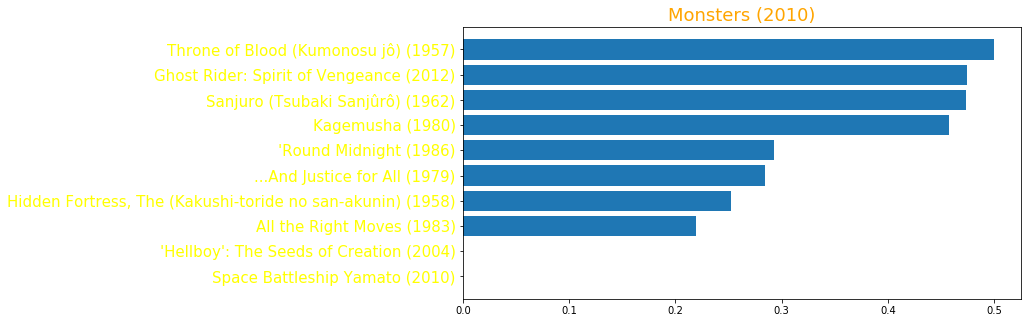

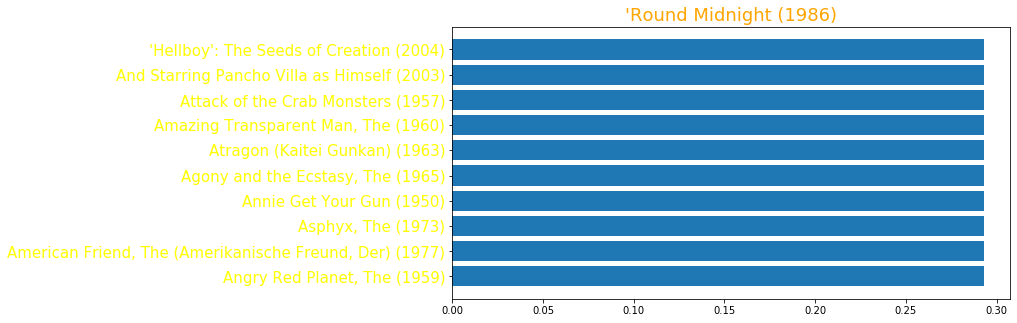

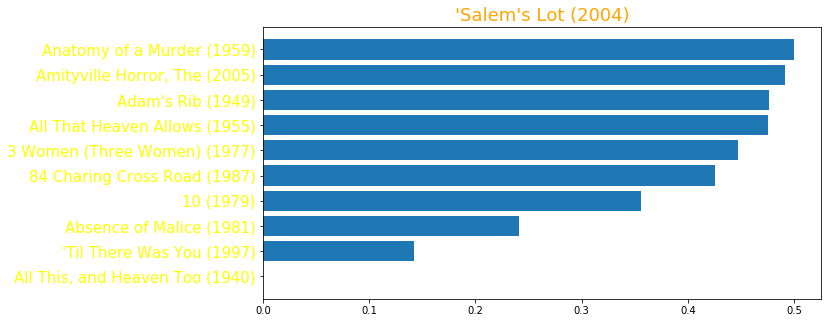

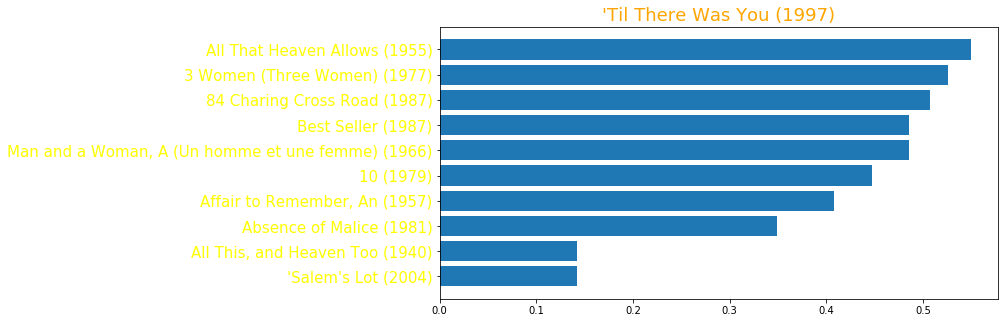

In [43]:
for cur_dis, cur_indx in zip(distances, indices):
    plt.figure(figsize = (10, 5))
    plt.title(moviemat.index[cur_indx[0]], fontsize = 18, color = 'orange')
    plt.barh(moviemat.index[cur_indx[1:]], cur_dis[1:])
    plt.yticks(fontsize = 15, color = 'yellow')